In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
%matplotlib inline
cf.go_offline()

In [4]:
df = pd.read_csv('./shootings.csv')

In [5]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

In [7]:
df.shape

(4895, 15)

In [8]:
df.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


In [9]:
nulls = [(df[c].isnull().mean()*100) for c in df]
pd.DataFrame(nulls,index=df.columns,columns=['Percentage'])

,Percentage
id,0.0
name,0.0
date,0.0
manner_of_death,0.0
armed,0.0
age,0.0
gender,0.0
race,0.0
city,0.0
state,0.0


In [8]:
pd.DataFrame(df['gender'].value_counts())

,gender
M,4673
F,222


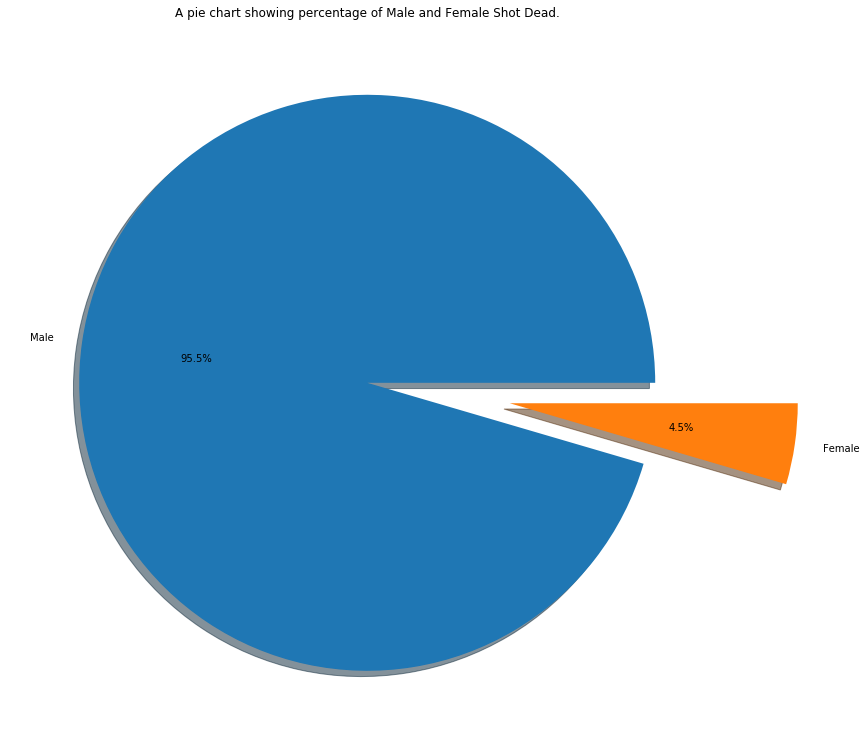

In [9]:
labels = ['Male','Female']
fig = plt.figure(figsize=(10,15))
ax = fig.add_axes([0,0,1,1])
ax.pie(x=df['gender'].value_counts(),labels=labels,shadow=True,explode=(0,0.5),autopct='%1.1f%%')
ax.set_title("A pie chart showing percentage of Male and Female Shot Dead.")
plt.show()

The above pie chart shows that about 95%(4673) of the total individuals shot dead were males and the rest 4.5%(222) were females. 

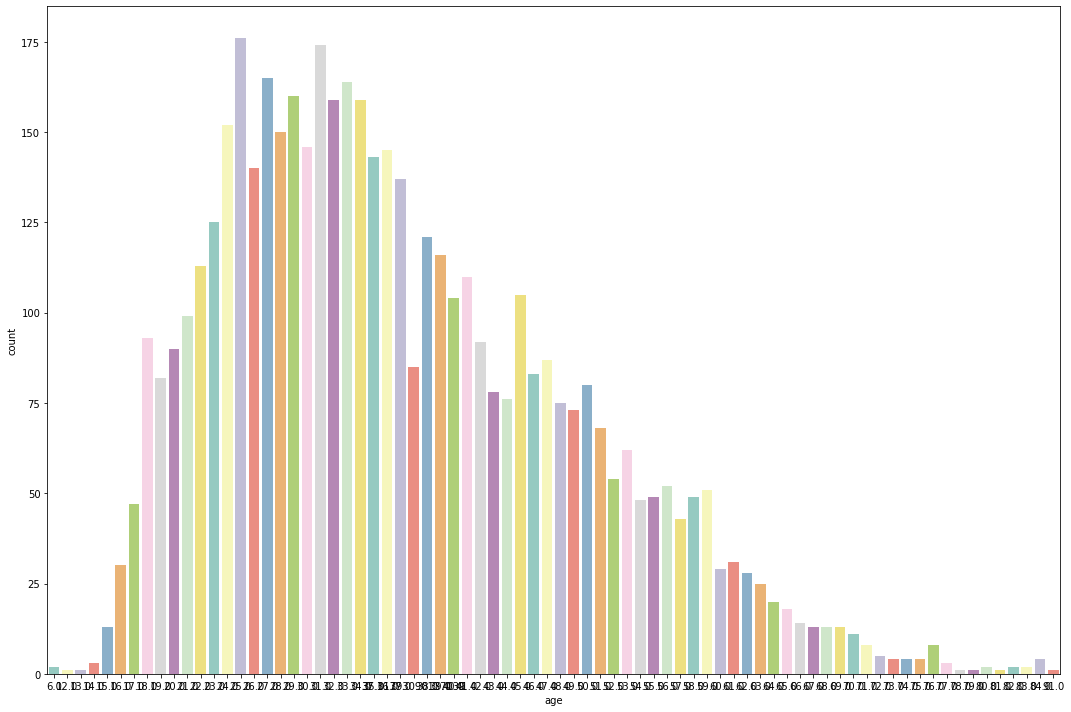

In [10]:
plt.figure(figsize=(15,10))
sns.countplot('age',data=df,linewidth=5,palette="Set3")
plt.tight_layout()

In [62]:
pd.DataFrame(df['age'].value_counts().head(20))

,age
25.0,176
31.0,174
27.0,165
33.0,164
29.0,160
32.0,159
34.0,159
24.0,152
28.0,150
30.0,146


Individuals with ages ranging between 25 and 35 had the most number of offenders.

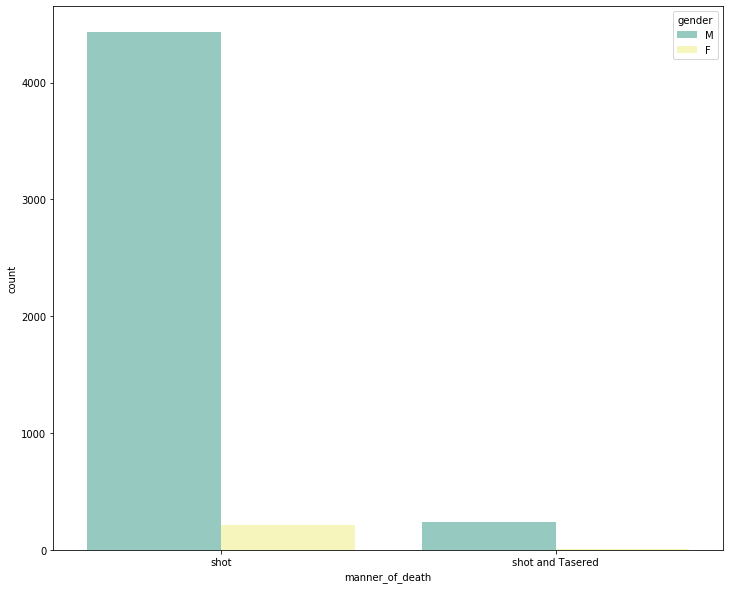

In [59]:
plt.figure(figsize=(12,10))
sns.countplot('manner_of_death',data=df,hue='gender',palette="Set3")

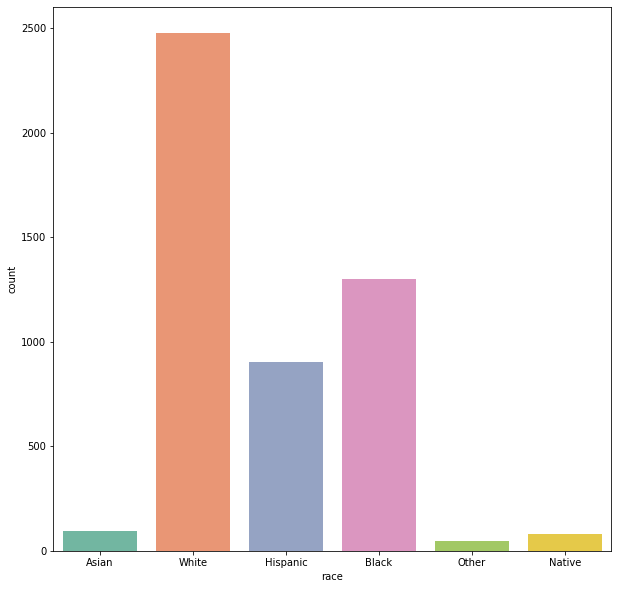

In [19]:
plt.figure(figsize=[10,10])
sns.countplot(df['race'],data = df)

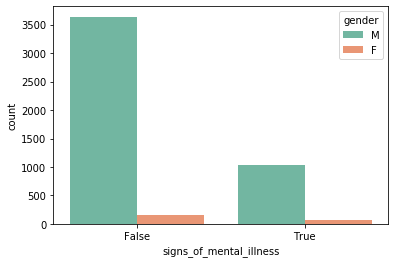

In [18]:
plt.figure(figsize=[10,10])
sns.set_palette(palette='Set2')
sns.countplot('signs_of_mental_illness',data=df,hue=df['gender'])

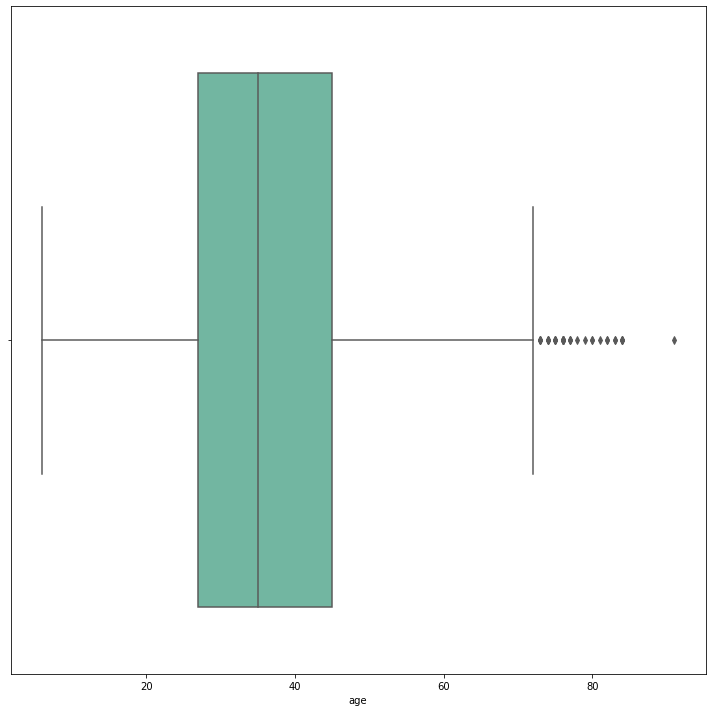

In [25]:
plt.figure(figsize=[10,10])
sns.boxplot('age',data=df)
plt.xscale('linear')
plt.tight_layout()

In [30]:
df['year']=pd.to_datetime(df['date']).dt.year
shoot_gender=df.groupby(['year','gender']).agg('count')['id'].to_frame(name='count').reset_index()


In [31]:
shoot_gender

,year,gender,count
0,2015,F,41
1,2015,M,924
2,2016,F,38
3,2016,M,866
4,2017,F,40
5,2017,M,866
6,2018,F,48
7,2018,M,840
8,2019,F,40
9,2019,M,818


In [48]:
age = pd.to_datetime(df['date']).dt.date

In [49]:
print(age)

0       2015-01-02
1       2015-01-02
2       2015-01-03
3       2015-01-04
4       2015-01-04
           ...    
4890    2020-06-12
4891    2020-06-12
4892    2020-06-13
4893    2020-06-13
4894    2020-06-15
Name: date, Length: 4895, dtype: object


In [54]:
age = pd.to_datetime(df['date']).dt.year

In [55]:
print(age)

0       2015
1       2015
2       2015
3       2015
4       2015
        ... 
4890    2020
4891    2020
4892    2020
4893    2020
4894    2020
Name: date, Length: 4895, dtype: int64
